# HPH第三版实验

### 思路

*id统计相关*
1. item_id, shop_id的交易量, 交易率
2. item_id, shop_id7天是否新出现, 3天是否新出现, 昨天是否新出现
3. 提交并且验证线上分数

In [3]:
import sys
sys.path.append("..")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

train_df = pd.read_table('../../round1_ijcai_18_train_20180301.txt',sep=' ')
test_df = pd.read_table('../../round1_ijcai_18_test_a_20180301.txt',sep=' ')

# 线下线上数据统一进行特征处理
test_df['is_trade'] = -1
total_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

# 1 数据集统一处理

In [4]:
# 时间处理: 分离天, 星期几, 上中下午/晚上, 小时数
# date最终不使用，直接用day(第 0 - 7 天)

from sklearn import preprocessing
from datetime import datetime
le = preprocessing.LabelEncoder()

def extract_date(x):
    d = datetime.fromtimestamp(x)
    return d.strftime('%Y-%m-%d')
def extract_weekday(x):
    d = datetime.fromtimestamp(x)
    return d.weekday()
def extract_hour(x):
    d = datetime.fromtimestamp(x)
    return d.hour

total_df['date'] = total_df['context_timestamp'].apply(lambda x: extract_date(x))
total_df['day'] = le.fit_transform(total_df['date'])
total_df['weekday'] = total_df['context_timestamp'].apply(lambda x: extract_weekday(x))
total_df['hour'] = total_df['context_timestamp'].apply(lambda x: extract_hour(x))

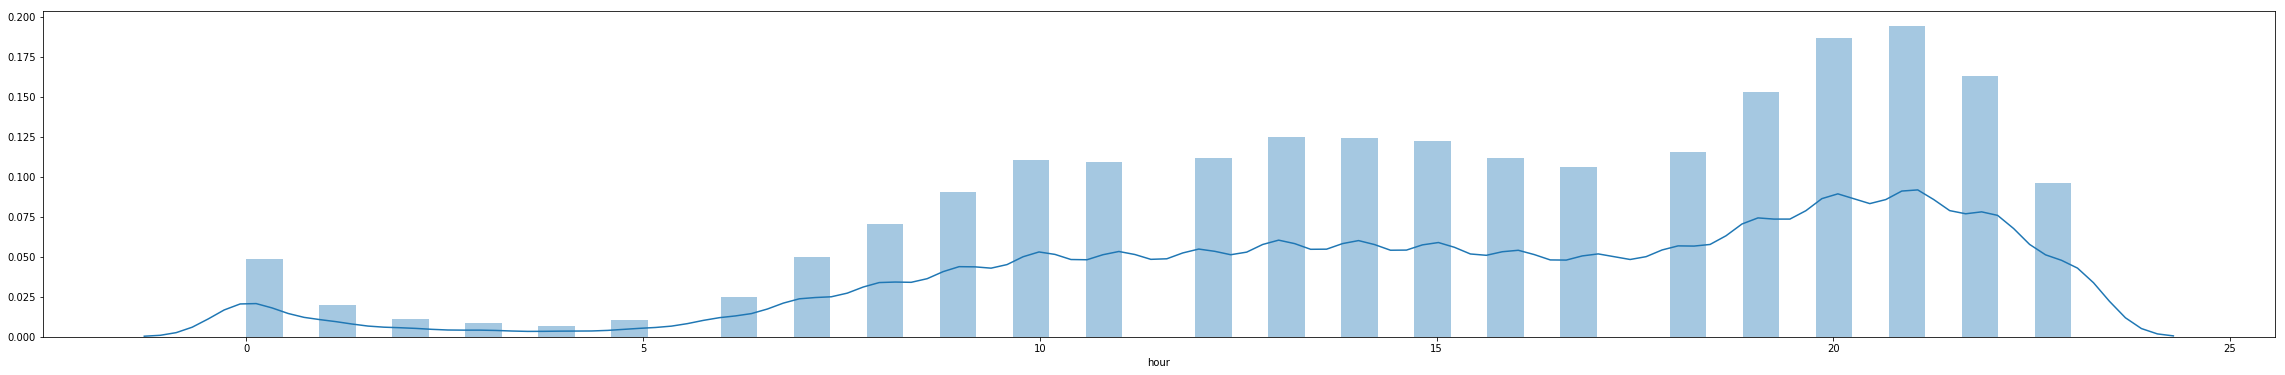

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(40, 6))
sns.distplot(total_df['hour'], ax=ax)
#total_df['hour'].plot(kind='hist')

In [6]:
%run ../util/time_utils.py
for i in range(1, 8):

    total_df = getColDupByDate(total_df, 'date', 'item_id', i)
    total_df = getColDupByDate(total_df, 'date', 'item_brand_id', i)
    total_df = getColDupByDate(total_df, 'date', 'shop_id', i)
    total_df = getColDupByDate(total_df, 'date', 'user_id', i)

In [8]:
# 计算前一天的交易率set到下一天，第0天用回自己
%run ../util/time_utils.py

setTradeRateByDate(total_df, ['item_city_id', 'item_id', 'item_brand_id', 'shop_id', 'user_id'])

column item_city_id trade_rate cal_day [0] set to day 0
column item_city_id trade_rate cal_day [0] set to day 1
column item_city_id trade_rate cal_day [0 1] set to day 2
column item_city_id trade_rate cal_day [0 1 2] set to day 3
column item_city_id trade_rate cal_day [0 3 1 2] set to day 4
column item_city_id trade_rate cal_day [0 3 1 2 4] set to day 5
column item_city_id trade_rate cal_day [0 3 1 2 4 5] set to day 6
column item_id trade_rate cal_day [0] set to day 0
column item_id trade_rate cal_day [0] set to day 1
column item_id trade_rate cal_day [0 1] set to day 2
column item_id trade_rate cal_day [0 1 2] set to day 3
column item_id trade_rate cal_day [0 3 1 2] set to day 4
column item_id trade_rate cal_day [0 3 1 2 4] set to day 5
column item_id trade_rate cal_day [0 3 1 2 4 5] set to day 6
column item_brand_id trade_rate cal_day [0] set to day 0
column item_brand_id trade_rate cal_day [0] set to day 1
column item_brand_id trade_rate cal_day [0 1] set to day 2
column item_brand_

In [9]:
total_df.columns.values

array(['instance_id', 'item_id', 'item_category_list',
       'item_property_list', 'item_brand_id', 'item_city_id',
       'item_price_level', 'item_sales_level', 'item_collected_level',
       'item_pv_level', 'user_id', 'user_gender_id', 'user_age_level',
       'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'predict_category_property',
       'shop_id', 'shop_review_num_level', 'shop_review_positive_rate',
       'shop_star_level', 'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade', 'date', 'day', 'weekday',
       'hour', 'item_id_dup_g_1', 'item_brand_id_dup_g_1',
       'shop_id_dup_g_1', 'user_id_dup_g_1', 'item_id_dup_g_2',
       'item_brand_id_dup_g_2', 'shop_id_dup_g_2', 'user_id_dup_g_2',
       'item_id_dup_g_3', 'item_brand_id_dup_g_3', 'shop_id_dup_g_3',
       'user_id_dup_g_3', 'item_id_dup_g_4', 'item_brand_id_dup_g_4',
       'shop_id_dup_g_4', 'user_id_dup_g_4', 'item_id_du

In [155]:
# 分桶
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

# total_df['item_city_id_pv_cut'] = pd.cut(total_df['item_city_id_pv'].values, bins=10, retbins=False)
# total_df['item_id_pv_cut'] = pd.cut(total_df['item_id_pv'].values, bins=10, retbins=False)
# total_df['shop_id_pv_cut'] = pd.cut(total_df['shop_id_pv'].values, bins=10, retbins=False)
# total_df['item_brand_id_pv_cut'] = pd.cut(total_df['item_brand_id_pv'].values, bins=10, retbins=False)
# total_df['user_occupation_id_pv_cut'] = pd.cut(total_df['user_occupation_id_pv'].values, bins=10, retbins=False)

# total_df['item_city_id_pv_cut'] = le.fit_transform(total_df['item_city_id_pv_cut'].copy())
# total_df['item_id_pv_cut'] = le.fit_transform(total_df['item_id_pv_cut'].copy())
# total_df['shop_id_pv_cut'] = le.fit_transform(total_df['shop_id_pv_cut'].copy())
# total_df['item_brand_id_pv_cut'] = le.fit_transform(total_df['item_brand_id_pv_cut'].copy())
# total_df['user_occupation_id_pv_cut'] = le.fit_transform(total_df['user_occupation_id_pv_cut'].copy())

In [ ]:
# standardization and scaling

# from sklearn import preprocessing

# def scale(df, idCol):
#     min_max_scaler = preprocessing.RobustScaler()
#     a = min_max_scaler.fit_transform(df[idCol].values.reshape(-1, 1))
#     return pd.Series(a.reshape(1, -1)[0])

# # 令数据再少一些?
# total_df['shop_score_service_scaled'] = scale(total_df, 'shop_score_service')
# total_df['shop_score_delivery_scaled'] = scale(total_df, 'shop_score_delivery')
# total_df['shop_score_description_scaled'] = scale(total_df, 'shop_score_description')
# total_df['shop_review_positive_rate_scaled'] = scale(total_df, 'shop_review_positive_rate')

# for col in total_df:
#     if not col.startswith('exp_d'):
#         continue
#     total_df[col + '_scaled'] = scale(total_df, col)

# # 变得可重入
# for col in total_df:
#     if col.endswith('_scaled_scaled'):
#         del total_df[col]

# 2 生成矩阵数据

In [10]:
total_df.columns.values

array(['instance_id', 'item_id', 'item_category_list',
       'item_property_list', 'item_brand_id', 'item_city_id',
       'item_price_level', 'item_sales_level', 'item_collected_level',
       'item_pv_level', 'user_id', 'user_gender_id', 'user_age_level',
       'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'predict_category_property',
       'shop_id', 'shop_review_num_level', 'shop_review_positive_rate',
       'shop_star_level', 'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade', 'date', 'day', 'weekday',
       'hour', 'item_id_dup_g_1', 'item_brand_id_dup_g_1',
       'shop_id_dup_g_1', 'user_id_dup_g_1', 'item_id_dup_g_2',
       'item_brand_id_dup_g_2', 'shop_id_dup_g_2', 'user_id_dup_g_2',
       'item_id_dup_g_3', 'item_brand_id_dup_g_3', 'shop_id_dup_g_3',
       'user_id_dup_g_3', 'item_id_dup_g_4', 'item_brand_id_dup_g_4',
       'shop_id_dup_g_4', 'user_id_dup_g_4', 'item_id_du

In [11]:
train_df = total_df[total_df['is_trade']>=0]
test_df = total_df[total_df['is_trade']<0]

non_feat_columns = ['context_timestamp', 'instance_id', 'is_trade', 'context_id',
                   'item_property_list', 'item_category_list', 'date', 'predict_category_property'
                   ]

D = train_df[['date']]
X = train_df.drop(non_feat_columns, axis=1).values
y = train_df[['is_trade']].values.ravel()

X_online = test_df.drop(non_feat_columns, axis=1).values
print(D.shape, X.shape, y.shape, X_online.shape)

(478138, 1) (478138, 62) (478138,) (18371, 62)


In [12]:
# 训练模型
# from sklearn.model_selection import GridSearchCV as GSCV   #Perforing grid search
# from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
import xgboost

import lightgbm as lgb

%run ../util/time_series_split.py


m = None

# 出离线结果, 留空最后一天数据
train_indices = D[(D['date'] >= '2018-09-19') & (D['date'] <= '2018-09-23')].index.values
test_indices = D[D['date'] == '2018-09-24'].index.values

print(train_indices.shape, test_indices.shape)
# dtsv = DateTimeSplit(dateSeries=D, fmt="%Y-%m-%d", n=1)
# for train_i, test_i in dtsv.split(X, y):
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

# clf = lgb.LGBMClassifier(n_jobs=20)
clf = xgboost.XGBClassifier(n_jobs=5)
m = clf.fit(X_train, y_train)
print('train logloss: %s, test logloss: %s' % \
      (log_loss(y_train, m.predict_proba(X_train)), \
       log_loss(y_test, m.predict_proba(X_test))))
# baseline train logloss: 0.0900087417141, test logloss: 0.082721774823
# without duplicatie train logloss: 0.0901497906901, test logloss: 0.0827584824615
# 没有平滑交易率: train logloss: 0.0766156769486, test logloss: 0.0824794973167
# + smooth = 100, mean = 0.1 train logloss: 0.0773046615726, test logloss: 0.0823854984755
# + smooth = 200, mean = 0.05 train logloss: 0.0770508661308, test logloss: 0.0823597300654
# + 过去7天作为交易率 train logloss: 0.0769139145409, test logloss: 0.082069491692
# + 训练数据丢弃第一天 train logloss: 0.0885656144401, test logloss: 0.081962601964


(342449,) (57421,)
train logloss: 0.0885663213684, test logloss: 0.0819599280309


In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((342449, 62), (342449,), (57421, 62), (57421,))

In [14]:
# 输出比赛格式
online_i = D[(D['date'] >= '2018-09-19') & (D['date'] <= '2018-09-24')].index.values
#m = clf.fit(X[online_i], y[online_i])
result = pd.DataFrame()
result['instance_id'] = test_df['instance_id']
result['predicted_score'] = pd.DataFrame(m.predict_proba(X_online))[1].values
result.to_csv('off8195.csv', sep = ' ', header=True, index = False)




# 补充实验 : 模拟a,b榜

In [58]:
print(X_val_a.shape, y_val_a.shape, X_val_b.shape, y_val_b.shape)

rand_states = []
bias = 0.0
for i in range(0, 3000):
    X_val_a, X_val_b, y_val_a, y_val_b = train_test_split(X_test, y_test, test_size=0.7, shuffle=True, random_state=i)
    # train_loss = log_loss(y_train, m.predict_proba(X_train))
    
    val_a_loss = log_loss(y_val_a, m.predict_proba(X_val_a))
    val_b_loss = log_loss(y_val_b, m.predict_proba(X_val_b))
    bias = bias + val_a_loss - val_b_loss
    if val_a_loss > 0.089:
        rand_states.append(i)
    
    print('第 %s 次: A: %.5f, B: %.5f, A_B_mean: %.5f, bias: %.5f' % \
          ( i, val_a_loss, val_b_loss, (val_a_loss*0.3+val_b_loss*0.7), bias))
    
test_loss = log_loss(y_test, m.predict_proba(X_test))
print('test logloss: %.5f, 总的bias: %s' % (test_loss, bias))
print(rand_states)

(17226, 62) (17226,) (40195, 62) (40195,)
第 0 次: A: 0.08572, B: 0.08035, A_B_mean: 0.08196, bias: 0.00538
第 1 次: A: 0.07786, B: 0.08372, A_B_mean: 0.08196, bias: -0.00048
第 2 次: A: 0.08532, B: 0.08052, A_B_mean: 0.08196, bias: 0.00432
第 3 次: A: 0.08190, B: 0.08199, A_B_mean: 0.08196, bias: 0.00423
第 4 次: A: 0.07828, B: 0.08354, A_B_mean: 0.08196, bias: -0.00103
第 5 次: A: 0.08542, B: 0.08048, A_B_mean: 0.08196, bias: 0.00391
第 6 次: A: 0.08280, B: 0.08160, A_B_mean: 0.08196, bias: 0.00511
第 7 次: A: 0.08569, B: 0.08036, A_B_mean: 0.08196, bias: 0.01044
第 8 次: A: 0.07901, B: 0.08322, A_B_mean: 0.08196, bias: 0.00622
第 9 次: A: 0.08600, B: 0.08023, A_B_mean: 0.08196, bias: 0.01199
第 10 次: A: 0.08645, B: 0.08003, A_B_mean: 0.08196, bias: 0.01841
第 11 次: A: 0.07863, B: 0.08339, A_B_mean: 0.08196, bias: 0.01365
第 12 次: A: 0.07886, B: 0.08329, A_B_mean: 0.08196, bias: 0.00923
第 13 次: A: 0.07669, B: 0.08422, A_B_mean: 0.08196, bias: 0.00171
第 14 次: A: 0.08613, B: 0.08017, A_B_mean: 0.08196, bias:

第 124 次: A: 0.08298, B: 0.08152, A_B_mean: 0.08196, bias: -0.04540
第 125 次: A: 0.08188, B: 0.08200, A_B_mean: 0.08196, bias: -0.04552
第 126 次: A: 0.08645, B: 0.08003, A_B_mean: 0.08196, bias: -0.03910
第 127 次: A: 0.07909, B: 0.08319, A_B_mean: 0.08196, bias: -0.04320
第 128 次: A: 0.07971, B: 0.08292, A_B_mean: 0.08196, bias: -0.04641
第 129 次: A: 0.07793, B: 0.08369, A_B_mean: 0.08196, bias: -0.05216
第 130 次: A: 0.08057, B: 0.08256, A_B_mean: 0.08196, bias: -0.05415
第 131 次: A: 0.08774, B: 0.07948, A_B_mean: 0.08196, bias: -0.04589
第 132 次: A: 0.08891, B: 0.07898, A_B_mean: 0.08196, bias: -0.03596
第 133 次: A: 0.08814, B: 0.07931, A_B_mean: 0.08196, bias: -0.02713
第 134 次: A: 0.08208, B: 0.08191, A_B_mean: 0.08196, bias: -0.02696
第 135 次: A: 0.07754, B: 0.08385, A_B_mean: 0.08196, bias: -0.03328
第 136 次: A: 0.07891, B: 0.08327, A_B_mean: 0.08196, bias: -0.03763
第 137 次: A: 0.07956, B: 0.08299, A_B_mean: 0.08196, bias: -0.04107
第 138 次: A: 0.08143, B: 0.08219, A_B_mean: 0.08196, bias: -0.0

第 248 次: A: 0.07881, B: 0.08331, A_B_mean: 0.08196, bias: 0.03767
第 249 次: A: 0.08746, B: 0.07960, A_B_mean: 0.08196, bias: 0.04553
第 250 次: A: 0.08173, B: 0.08206, A_B_mean: 0.08196, bias: 0.04520
第 251 次: A: 0.08194, B: 0.08197, A_B_mean: 0.08196, bias: 0.04517
第 252 次: A: 0.08374, B: 0.08120, A_B_mean: 0.08196, bias: 0.04772
第 253 次: A: 0.07953, B: 0.08300, A_B_mean: 0.08196, bias: 0.04424
第 254 次: A: 0.07978, B: 0.08289, A_B_mean: 0.08196, bias: 0.04113
第 255 次: A: 0.08326, B: 0.08140, A_B_mean: 0.08196, bias: 0.04299
第 256 次: A: 0.07841, B: 0.08348, A_B_mean: 0.08196, bias: 0.03791
第 257 次: A: 0.08486, B: 0.08072, A_B_mean: 0.08196, bias: 0.04205
第 258 次: A: 0.08107, B: 0.08234, A_B_mean: 0.08196, bias: 0.04079
第 259 次: A: 0.08236, B: 0.08179, A_B_mean: 0.08196, bias: 0.04135
第 260 次: A: 0.08665, B: 0.07995, A_B_mean: 0.08196, bias: 0.04805
第 261 次: A: 0.08251, B: 0.08173, A_B_mean: 0.08196, bias: 0.04884
第 262 次: A: 0.08125, B: 0.08226, A_B_mean: 0.08196, bias: 0.04783
第 263 次: A

第 373 次: A: 0.08369, B: 0.08122, A_B_mean: 0.08196, bias: -0.00481
第 374 次: A: 0.07921, B: 0.08314, A_B_mean: 0.08196, bias: -0.00875
第 375 次: A: 0.08057, B: 0.08256, A_B_mean: 0.08196, bias: -0.01074
第 376 次: A: 0.08228, B: 0.08182, A_B_mean: 0.08196, bias: -0.01027
第 377 次: A: 0.07881, B: 0.08331, A_B_mean: 0.08196, bias: -0.01477
第 378 次: A: 0.07390, B: 0.08542, A_B_mean: 0.08196, bias: -0.02629
第 379 次: A: 0.07840, B: 0.08349, A_B_mean: 0.08196, bias: -0.03138
第 380 次: A: 0.08651, B: 0.08001, A_B_mean: 0.08196, bias: -0.02488
第 381 次: A: 0.08067, B: 0.08251, A_B_mean: 0.08196, bias: -0.02672
第 382 次: A: 0.07811, B: 0.08361, A_B_mean: 0.08196, bias: -0.03222
第 383 次: A: 0.07342, B: 0.08562, A_B_mean: 0.08196, bias: -0.04442
第 384 次: A: 0.08635, B: 0.08008, A_B_mean: 0.08196, bias: -0.03814
第 385 次: A: 0.08235, B: 0.08179, A_B_mean: 0.08196, bias: -0.03758
第 386 次: A: 0.07822, B: 0.08356, A_B_mean: 0.08196, bias: -0.04292
第 387 次: A: 0.08623, B: 0.08013, A_B_mean: 0.08196, bias: -0.0

第 496 次: A: 0.08247, B: 0.08174, A_B_mean: 0.08196, bias: -0.08517
第 497 次: A: 0.08153, B: 0.08214, A_B_mean: 0.08196, bias: -0.08578
第 498 次: A: 0.08103, B: 0.08236, A_B_mean: 0.08196, bias: -0.08711
第 499 次: A: 0.08232, B: 0.08180, A_B_mean: 0.08196, bias: -0.08660
第 500 次: A: 0.08357, B: 0.08127, A_B_mean: 0.08196, bias: -0.08430
第 501 次: A: 0.08434, B: 0.08094, A_B_mean: 0.08196, bias: -0.08090
第 502 次: A: 0.07989, B: 0.08285, A_B_mean: 0.08196, bias: -0.08385
第 503 次: A: 0.08499, B: 0.08066, A_B_mean: 0.08196, bias: -0.07953
第 504 次: A: 0.07831, B: 0.08352, A_B_mean: 0.08196, bias: -0.08474
第 505 次: A: 0.07783, B: 0.08373, A_B_mean: 0.08196, bias: -0.09064
第 506 次: A: 0.08258, B: 0.08170, A_B_mean: 0.08196, bias: -0.08976
第 507 次: A: 0.07953, B: 0.08300, A_B_mean: 0.08196, bias: -0.09324
第 508 次: A: 0.07883, B: 0.08330, A_B_mean: 0.08196, bias: -0.09771
第 509 次: A: 0.08464, B: 0.08081, A_B_mean: 0.08196, bias: -0.09388
第 510 次: A: 0.08635, B: 0.08008, A_B_mean: 0.08196, bias: -0.0

第 619 次: A: 0.07974, B: 0.08291, A_B_mean: 0.08196, bias: -0.09216
第 620 次: A: 0.08009, B: 0.08276, A_B_mean: 0.08196, bias: -0.09484
第 621 次: A: 0.08067, B: 0.08251, A_B_mean: 0.08196, bias: -0.09668
第 622 次: A: 0.07960, B: 0.08297, A_B_mean: 0.08196, bias: -0.10005
第 623 次: A: 0.08172, B: 0.08206, A_B_mean: 0.08196, bias: -0.10039
第 624 次: A: 0.09039, B: 0.07835, A_B_mean: 0.08196, bias: -0.08835
第 625 次: A: 0.08299, B: 0.08152, A_B_mean: 0.08196, bias: -0.08688
第 626 次: A: 0.08300, B: 0.08152, A_B_mean: 0.08196, bias: -0.08540
第 627 次: A: 0.07731, B: 0.08395, A_B_mean: 0.08196, bias: -0.09205
第 628 次: A: 0.08258, B: 0.08169, A_B_mean: 0.08196, bias: -0.09115
第 629 次: A: 0.08063, B: 0.08253, A_B_mean: 0.08196, bias: -0.09305
第 630 次: A: 0.08361, B: 0.08125, A_B_mean: 0.08196, bias: -0.09070
第 631 次: A: 0.08103, B: 0.08236, A_B_mean: 0.08196, bias: -0.09203
第 632 次: A: 0.08192, B: 0.08198, A_B_mean: 0.08196, bias: -0.09208
第 633 次: A: 0.08558, B: 0.08041, A_B_mean: 0.08196, bias: -0.0

第 743 次: A: 0.07982, B: 0.08288, A_B_mean: 0.08196, bias: -0.11097
第 744 次: A: 0.08461, B: 0.08083, A_B_mean: 0.08196, bias: -0.10719
第 745 次: A: 0.07967, B: 0.08294, A_B_mean: 0.08196, bias: -0.11045
第 746 次: A: 0.08489, B: 0.08071, A_B_mean: 0.08196, bias: -0.10627
第 747 次: A: 0.08024, B: 0.08270, A_B_mean: 0.08196, bias: -0.10873
第 748 次: A: 0.08043, B: 0.08262, A_B_mean: 0.08196, bias: -0.11092
第 749 次: A: 0.08265, B: 0.08166, A_B_mean: 0.08196, bias: -0.10993
第 750 次: A: 0.08283, B: 0.08159, A_B_mean: 0.08196, bias: -0.10869
第 751 次: A: 0.07703, B: 0.08407, A_B_mean: 0.08196, bias: -0.11573
第 752 次: A: 0.08549, B: 0.08045, A_B_mean: 0.08196, bias: -0.11068
第 753 次: A: 0.08726, B: 0.07969, A_B_mean: 0.08196, bias: -0.10311
第 754 次: A: 0.08251, B: 0.08173, A_B_mean: 0.08196, bias: -0.10233
第 755 次: A: 0.08248, B: 0.08174, A_B_mean: 0.08196, bias: -0.10159
第 756 次: A: 0.08038, B: 0.08264, A_B_mean: 0.08196, bias: -0.10384
第 757 次: A: 0.07694, B: 0.08411, A_B_mean: 0.08196, bias: -0.1

第 866 次: A: 0.08758, B: 0.07955, A_B_mean: 0.08196, bias: -0.11606
第 867 次: A: 0.08384, B: 0.08115, A_B_mean: 0.08196, bias: -0.11337
第 868 次: A: 0.08032, B: 0.08266, A_B_mean: 0.08196, bias: -0.11571
第 869 次: A: 0.07995, B: 0.08282, A_B_mean: 0.08196, bias: -0.11857
第 870 次: A: 0.08365, B: 0.08123, A_B_mean: 0.08196, bias: -0.11616
第 871 次: A: 0.08111, B: 0.08233, A_B_mean: 0.08196, bias: -0.11738
第 872 次: A: 0.08213, B: 0.08189, A_B_mean: 0.08196, bias: -0.11713
第 873 次: A: 0.07711, B: 0.08404, A_B_mean: 0.08196, bias: -0.12406
第 874 次: A: 0.08105, B: 0.08235, A_B_mean: 0.08196, bias: -0.12535
第 875 次: A: 0.08535, B: 0.08051, A_B_mean: 0.08196, bias: -0.12051
第 876 次: A: 0.08715, B: 0.07973, A_B_mean: 0.08196, bias: -0.11309
第 877 次: A: 0.08505, B: 0.08063, A_B_mean: 0.08196, bias: -0.10867
第 878 次: A: 0.08311, B: 0.08147, A_B_mean: 0.08196, bias: -0.10704
第 879 次: A: 0.08445, B: 0.08089, A_B_mean: 0.08196, bias: -0.10347
第 880 次: A: 0.07637, B: 0.08436, A_B_mean: 0.08196, bias: -0.1

第 989 次: A: 0.08058, B: 0.08255, A_B_mean: 0.08196, bias: -0.09386
第 990 次: A: 0.08440, B: 0.08092, A_B_mean: 0.08196, bias: -0.09038
第 991 次: A: 0.08514, B: 0.08060, A_B_mean: 0.08196, bias: -0.08583
第 992 次: A: 0.08145, B: 0.08218, A_B_mean: 0.08196, bias: -0.08656
第 993 次: A: 0.08316, B: 0.08145, A_B_mean: 0.08196, bias: -0.08485
第 994 次: A: 0.08102, B: 0.08236, A_B_mean: 0.08196, bias: -0.08619
第 995 次: A: 0.07980, B: 0.08288, A_B_mean: 0.08196, bias: -0.08928
第 996 次: A: 0.08616, B: 0.08016, A_B_mean: 0.08196, bias: -0.08328
第 997 次: A: 0.08311, B: 0.08147, A_B_mean: 0.08196, bias: -0.08164
第 998 次: A: 0.07797, B: 0.08367, A_B_mean: 0.08196, bias: -0.08734
第 999 次: A: 0.08120, B: 0.08229, A_B_mean: 0.08196, bias: -0.08842
第 1000 次: A: 0.08539, B: 0.08049, A_B_mean: 0.08196, bias: -0.08352
第 1001 次: A: 0.08452, B: 0.08086, A_B_mean: 0.08196, bias: -0.07986
第 1002 次: A: 0.07549, B: 0.08473, A_B_mean: 0.08196, bias: -0.08910
第 1003 次: A: 0.07734, B: 0.08394, A_B_mean: 0.08196, bias: 

第 1109 次: A: 0.07636, B: 0.08436, A_B_mean: 0.08196, bias: -0.15502
第 1110 次: A: 0.07772, B: 0.08378, A_B_mean: 0.08196, bias: -0.16108
第 1111 次: A: 0.08142, B: 0.08219, A_B_mean: 0.08196, bias: -0.16186
第 1112 次: A: 0.08545, B: 0.08046, A_B_mean: 0.08196, bias: -0.15687
第 1113 次: A: 0.08486, B: 0.08072, A_B_mean: 0.08196, bias: -0.15273
第 1114 次: A: 0.08223, B: 0.08184, A_B_mean: 0.08196, bias: -0.15235
第 1115 次: A: 0.08070, B: 0.08250, A_B_mean: 0.08196, bias: -0.15414
第 1116 次: A: 0.08352, B: 0.08129, A_B_mean: 0.08196, bias: -0.15191
第 1117 次: A: 0.08304, B: 0.08150, A_B_mean: 0.08196, bias: -0.15037
第 1118 次: A: 0.08513, B: 0.08060, A_B_mean: 0.08196, bias: -0.14585
第 1119 次: A: 0.08093, B: 0.08240, A_B_mean: 0.08196, bias: -0.14733
第 1120 次: A: 0.08838, B: 0.07921, A_B_mean: 0.08196, bias: -0.13816
第 1121 次: A: 0.07661, B: 0.08425, A_B_mean: 0.08196, bias: -0.14581
第 1122 次: A: 0.08138, B: 0.08221, A_B_mean: 0.08196, bias: -0.14664
第 1123 次: A: 0.08253, B: 0.08172, A_B_mean: 0.08

第 1232 次: A: 0.08036, B: 0.08264, A_B_mean: 0.08196, bias: -0.21930
第 1233 次: A: 0.08436, B: 0.08093, A_B_mean: 0.08196, bias: -0.21586
第 1234 次: A: 0.08094, B: 0.08240, A_B_mean: 0.08196, bias: -0.21732
第 1235 次: A: 0.08502, B: 0.08065, A_B_mean: 0.08196, bias: -0.21294
第 1236 次: A: 0.08252, B: 0.08172, A_B_mean: 0.08196, bias: -0.21214
第 1237 次: A: 0.08172, B: 0.08206, A_B_mean: 0.08196, bias: -0.21248
第 1238 次: A: 0.08064, B: 0.08253, A_B_mean: 0.08196, bias: -0.21437
第 1239 次: A: 0.07842, B: 0.08348, A_B_mean: 0.08196, bias: -0.21942
第 1240 次: A: 0.08210, B: 0.08190, A_B_mean: 0.08196, bias: -0.21923
第 1241 次: A: 0.07531, B: 0.08481, A_B_mean: 0.08196, bias: -0.22872
第 1242 次: A: 0.07335, B: 0.08565, A_B_mean: 0.08196, bias: -0.24102
第 1243 次: A: 0.07920, B: 0.08314, A_B_mean: 0.08196, bias: -0.24497
第 1244 次: A: 0.08382, B: 0.08116, A_B_mean: 0.08196, bias: -0.24231
第 1245 次: A: 0.08143, B: 0.08219, A_B_mean: 0.08196, bias: -0.24306
第 1246 次: A: 0.07999, B: 0.08280, A_B_mean: 0.08

第 1353 次: A: 0.08183, B: 0.08201, A_B_mean: 0.08196, bias: -0.25739
第 1354 次: A: 0.07867, B: 0.08337, A_B_mean: 0.08196, bias: -0.26210
第 1355 次: A: 0.08282, B: 0.08159, A_B_mean: 0.08196, bias: -0.26087
第 1356 次: A: 0.07647, B: 0.08431, A_B_mean: 0.08196, bias: -0.26871
第 1357 次: A: 0.07648, B: 0.08431, A_B_mean: 0.08196, bias: -0.27654
第 1358 次: A: 0.08472, B: 0.08078, A_B_mean: 0.08196, bias: -0.27260
第 1359 次: A: 0.08218, B: 0.08186, A_B_mean: 0.08196, bias: -0.27228
第 1360 次: A: 0.08103, B: 0.08236, A_B_mean: 0.08196, bias: -0.27361
第 1361 次: A: 0.07926, B: 0.08312, A_B_mean: 0.08196, bias: -0.27748
第 1362 次: A: 0.07768, B: 0.08379, A_B_mean: 0.08196, bias: -0.28359
第 1363 次: A: 0.08511, B: 0.08061, A_B_mean: 0.08196, bias: -0.27908
第 1364 次: A: 0.08749, B: 0.07959, A_B_mean: 0.08196, bias: -0.27119
第 1365 次: A: 0.08278, B: 0.08161, A_B_mean: 0.08196, bias: -0.27002
第 1366 次: A: 0.08575, B: 0.08033, A_B_mean: 0.08196, bias: -0.26460
第 1367 次: A: 0.08265, B: 0.08166, A_B_mean: 0.08

第 1474 次: A: 0.07957, B: 0.08299, A_B_mean: 0.08196, bias: -0.27535
第 1475 次: A: 0.08751, B: 0.07958, A_B_mean: 0.08196, bias: -0.26742
第 1476 次: A: 0.08433, B: 0.08095, A_B_mean: 0.08196, bias: -0.26404
第 1477 次: A: 0.08852, B: 0.07915, A_B_mean: 0.08196, bias: -0.25466
第 1478 次: A: 0.08323, B: 0.08141, A_B_mean: 0.08196, bias: -0.25284
第 1479 次: A: 0.08956, B: 0.07870, A_B_mean: 0.08196, bias: -0.24198
第 1480 次: A: 0.08054, B: 0.08257, A_B_mean: 0.08196, bias: -0.24400
第 1481 次: A: 0.08467, B: 0.08080, A_B_mean: 0.08196, bias: -0.24013
第 1482 次: A: 0.08354, B: 0.08128, A_B_mean: 0.08196, bias: -0.23787
第 1483 次: A: 0.07758, B: 0.08384, A_B_mean: 0.08196, bias: -0.24412
第 1484 次: A: 0.08281, B: 0.08160, A_B_mean: 0.08196, bias: -0.24291
第 1485 次: A: 0.08562, B: 0.08039, A_B_mean: 0.08196, bias: -0.23767
第 1486 次: A: 0.07821, B: 0.08357, A_B_mean: 0.08196, bias: -0.24303
第 1487 次: A: 0.08127, B: 0.08225, A_B_mean: 0.08196, bias: -0.24401
第 1488 次: A: 0.08264, B: 0.08167, A_B_mean: 0.08

第 1596 次: A: 0.07988, B: 0.08285, A_B_mean: 0.08196, bias: -0.19010
第 1597 次: A: 0.08416, B: 0.08102, A_B_mean: 0.08196, bias: -0.18695
第 1598 次: A: 0.08320, B: 0.08143, A_B_mean: 0.08196, bias: -0.18518
第 1599 次: A: 0.07569, B: 0.08465, A_B_mean: 0.08196, bias: -0.19414
第 1600 次: A: 0.07430, B: 0.08524, A_B_mean: 0.08196, bias: -0.20508
第 1601 次: A: 0.07918, B: 0.08315, A_B_mean: 0.08196, bias: -0.20906
第 1602 次: A: 0.08452, B: 0.08086, A_B_mean: 0.08196, bias: -0.20540
第 1603 次: A: 0.08314, B: 0.08145, A_B_mean: 0.08196, bias: -0.20371
第 1604 次: A: 0.08418, B: 0.08101, A_B_mean: 0.08196, bias: -0.20053
第 1605 次: A: 0.08424, B: 0.08098, A_B_mean: 0.08196, bias: -0.19727
第 1606 次: A: 0.08338, B: 0.08135, A_B_mean: 0.08196, bias: -0.19523
第 1607 次: A: 0.08282, B: 0.08159, A_B_mean: 0.08196, bias: -0.19400
第 1608 次: A: 0.08521, B: 0.08057, A_B_mean: 0.08196, bias: -0.18935
第 1609 次: A: 0.07841, B: 0.08348, A_B_mean: 0.08196, bias: -0.19442
第 1610 次: A: 0.08194, B: 0.08197, A_B_mean: 0.08

第 1717 次: A: 0.08563, B: 0.08039, A_B_mean: 0.08196, bias: -0.09467
第 1718 次: A: 0.07490, B: 0.08498, A_B_mean: 0.08196, bias: -0.10475
第 1719 次: A: 0.08343, B: 0.08133, A_B_mean: 0.08196, bias: -0.10264
第 1720 次: A: 0.08272, B: 0.08163, A_B_mean: 0.08196, bias: -0.10155
第 1721 次: A: 0.08044, B: 0.08261, A_B_mean: 0.08196, bias: -0.10372
第 1722 次: A: 0.08025, B: 0.08269, A_B_mean: 0.08196, bias: -0.10616
第 1723 次: A: 0.07965, B: 0.08295, A_B_mean: 0.08196, bias: -0.10945
第 1724 次: A: 0.07842, B: 0.08348, A_B_mean: 0.08196, bias: -0.11451
第 1725 次: A: 0.08125, B: 0.08226, A_B_mean: 0.08196, bias: -0.11552
第 1726 次: A: 0.07987, B: 0.08286, A_B_mean: 0.08196, bias: -0.11851
第 1727 次: A: 0.07929, B: 0.08311, A_B_mean: 0.08196, bias: -0.12233
第 1728 次: A: 0.07898, B: 0.08324, A_B_mean: 0.08196, bias: -0.12659
第 1729 次: A: 0.08322, B: 0.08142, A_B_mean: 0.08196, bias: -0.12480
第 1730 次: A: 0.08450, B: 0.08087, A_B_mean: 0.08196, bias: -0.12116
第 1731 次: A: 0.08379, B: 0.08118, A_B_mean: 0.08

第 1838 次: A: 0.08004, B: 0.08278, A_B_mean: 0.08196, bias: -0.12850
第 1839 次: A: 0.09095, B: 0.07811, A_B_mean: 0.08196, bias: -0.11565
第 1840 次: A: 0.08129, B: 0.08225, A_B_mean: 0.08196, bias: -0.11660
第 1841 次: A: 0.08414, B: 0.08102, A_B_mean: 0.08196, bias: -0.11348
第 1842 次: A: 0.07854, B: 0.08342, A_B_mean: 0.08196, bias: -0.11836
第 1843 次: A: 0.07620, B: 0.08443, A_B_mean: 0.08196, bias: -0.12659
第 1844 次: A: 0.08564, B: 0.08038, A_B_mean: 0.08196, bias: -0.12132
第 1845 次: A: 0.08087, B: 0.08243, A_B_mean: 0.08196, bias: -0.12288
第 1846 次: A: 0.08258, B: 0.08169, A_B_mean: 0.08196, bias: -0.12199
第 1847 次: A: 0.08223, B: 0.08185, A_B_mean: 0.08196, bias: -0.12161
第 1848 次: A: 0.08538, B: 0.08049, A_B_mean: 0.08196, bias: -0.11673
第 1849 次: A: 0.07756, B: 0.08385, A_B_mean: 0.08196, bias: -0.12301
第 1850 次: A: 0.08374, B: 0.08120, A_B_mean: 0.08196, bias: -0.12047
第 1851 次: A: 0.08124, B: 0.08227, A_B_mean: 0.08196, bias: -0.12150
第 1852 次: A: 0.08864, B: 0.07910, A_B_mean: 0.08

第 1959 次: A: 0.08285, B: 0.08158, A_B_mean: 0.08196, bias: -0.11370
第 1960 次: A: 0.08621, B: 0.08014, A_B_mean: 0.08196, bias: -0.10763
第 1961 次: A: 0.07797, B: 0.08367, A_B_mean: 0.08196, bias: -0.11333
第 1962 次: A: 0.08635, B: 0.08008, A_B_mean: 0.08196, bias: -0.10706
第 1963 次: A: 0.08143, B: 0.08219, A_B_mean: 0.08196, bias: -0.10782
第 1964 次: A: 0.08134, B: 0.08223, A_B_mean: 0.08196, bias: -0.10871
第 1965 次: A: 0.08097, B: 0.08238, A_B_mean: 0.08196, bias: -0.11013
第 1966 次: A: 0.08203, B: 0.08193, A_B_mean: 0.08196, bias: -0.11004
第 1967 次: A: 0.08583, B: 0.08030, A_B_mean: 0.08196, bias: -0.10451
第 1968 次: A: 0.07754, B: 0.08385, A_B_mean: 0.08196, bias: -0.11082
第 1969 次: A: 0.07952, B: 0.08301, A_B_mean: 0.08196, bias: -0.11430
第 1970 次: A: 0.08256, B: 0.08170, A_B_mean: 0.08196, bias: -0.11344
第 1971 次: A: 0.08108, B: 0.08234, A_B_mean: 0.08196, bias: -0.11470
第 1972 次: A: 0.08059, B: 0.08255, A_B_mean: 0.08196, bias: -0.11666
第 1973 次: A: 0.08567, B: 0.08037, A_B_mean: 0.08

第 2080 次: A: 0.08295, B: 0.08153, A_B_mean: 0.08196, bias: -0.13613
第 2081 次: A: 0.08677, B: 0.07990, A_B_mean: 0.08196, bias: -0.12925
第 2082 次: A: 0.08150, B: 0.08216, A_B_mean: 0.08196, bias: -0.12990
第 2083 次: A: 0.08548, B: 0.08045, A_B_mean: 0.08196, bias: -0.12488
第 2084 次: A: 0.08529, B: 0.08053, A_B_mean: 0.08196, bias: -0.12013
第 2085 次: A: 0.07622, B: 0.08442, A_B_mean: 0.08196, bias: -0.12833
第 2086 次: A: 0.07965, B: 0.08295, A_B_mean: 0.08196, bias: -0.13163
第 2087 次: A: 0.08266, B: 0.08166, A_B_mean: 0.08196, bias: -0.13063
第 2088 次: A: 0.08050, B: 0.08258, A_B_mean: 0.08196, bias: -0.13271
第 2089 次: A: 0.08552, B: 0.08043, A_B_mean: 0.08196, bias: -0.12761
第 2090 次: A: 0.08463, B: 0.08082, A_B_mean: 0.08196, bias: -0.12380
第 2091 次: A: 0.08546, B: 0.08046, A_B_mean: 0.08196, bias: -0.11879
第 2092 次: A: 0.08114, B: 0.08231, A_B_mean: 0.08196, bias: -0.11997
第 2093 次: A: 0.08447, B: 0.08089, A_B_mean: 0.08196, bias: -0.11639
第 2094 次: A: 0.08107, B: 0.08234, A_B_mean: 0.08

第 2201 次: A: 0.08218, B: 0.08187, A_B_mean: 0.08196, bias: -0.10918
第 2202 次: A: 0.08050, B: 0.08258, A_B_mean: 0.08196, bias: -0.11127
第 2203 次: A: 0.07670, B: 0.08422, A_B_mean: 0.08196, bias: -0.11879
第 2204 次: A: 0.08125, B: 0.08226, A_B_mean: 0.08196, bias: -0.11980
第 2205 次: A: 0.08677, B: 0.07990, A_B_mean: 0.08196, bias: -0.11293
第 2206 次: A: 0.08465, B: 0.08081, A_B_mean: 0.08196, bias: -0.10908
第 2207 次: A: 0.08642, B: 0.08005, A_B_mean: 0.08196, bias: -0.10271
第 2208 次: A: 0.07816, B: 0.08359, A_B_mean: 0.08196, bias: -0.10813
第 2209 次: A: 0.07771, B: 0.08378, A_B_mean: 0.08196, bias: -0.11421
第 2210 次: A: 0.08396, B: 0.08110, A_B_mean: 0.08196, bias: -0.11135
第 2211 次: A: 0.08133, B: 0.08223, A_B_mean: 0.08196, bias: -0.11225
第 2212 次: A: 0.08289, B: 0.08156, A_B_mean: 0.08196, bias: -0.11092
第 2213 次: A: 0.07370, B: 0.08550, A_B_mean: 0.08196, bias: -0.12273
第 2214 次: A: 0.07519, B: 0.08486, A_B_mean: 0.08196, bias: -0.13239
第 2215 次: A: 0.08221, B: 0.08185, A_B_mean: 0.08

第 2323 次: A: 0.07432, B: 0.08524, A_B_mean: 0.08196, bias: -0.09643
第 2324 次: A: 0.08543, B: 0.08047, A_B_mean: 0.08196, bias: -0.09147
第 2325 次: A: 0.07962, B: 0.08296, A_B_mean: 0.08196, bias: -0.09482
第 2326 次: A: 0.07911, B: 0.08318, A_B_mean: 0.08196, bias: -0.09889
第 2327 次: A: 0.07969, B: 0.08293, A_B_mean: 0.08196, bias: -0.10213
第 2328 次: A: 0.08065, B: 0.08252, A_B_mean: 0.08196, bias: -0.10401
第 2329 次: A: 0.08121, B: 0.08228, A_B_mean: 0.08196, bias: -0.10508
第 2330 次: A: 0.08379, B: 0.08118, A_B_mean: 0.08196, bias: -0.10247
第 2331 次: A: 0.08341, B: 0.08134, A_B_mean: 0.08196, bias: -0.10040
第 2332 次: A: 0.07853, B: 0.08343, A_B_mean: 0.08196, bias: -0.10530
第 2333 次: A: 0.07969, B: 0.08293, A_B_mean: 0.08196, bias: -0.10854
第 2334 次: A: 0.07802, B: 0.08365, A_B_mean: 0.08196, bias: -0.11417
第 2335 次: A: 0.07708, B: 0.08405, A_B_mean: 0.08196, bias: -0.12114
第 2336 次: A: 0.08149, B: 0.08216, A_B_mean: 0.08196, bias: -0.12181
第 2337 次: A: 0.07957, B: 0.08299, A_B_mean: 0.08

第 2444 次: A: 0.08285, B: 0.08158, A_B_mean: 0.08196, bias: -0.08646
第 2445 次: A: 0.08252, B: 0.08172, A_B_mean: 0.08196, bias: -0.08566
第 2446 次: A: 0.07804, B: 0.08364, A_B_mean: 0.08196, bias: -0.09126
第 2447 次: A: 0.07694, B: 0.08411, A_B_mean: 0.08196, bias: -0.09844
第 2448 次: A: 0.08244, B: 0.08176, A_B_mean: 0.08196, bias: -0.09776
第 2449 次: A: 0.08140, B: 0.08220, A_B_mean: 0.08196, bias: -0.09855
第 2450 次: A: 0.08503, B: 0.08064, A_B_mean: 0.08196, bias: -0.09417
第 2451 次: A: 0.07660, B: 0.08426, A_B_mean: 0.08196, bias: -0.10182
第 2452 次: A: 0.08575, B: 0.08034, A_B_mean: 0.08196, bias: -0.09640
第 2453 次: A: 0.08152, B: 0.08215, A_B_mean: 0.08196, bias: -0.09703
第 2454 次: A: 0.08567, B: 0.08037, A_B_mean: 0.08196, bias: -0.09172
第 2455 次: A: 0.07672, B: 0.08421, A_B_mean: 0.08196, bias: -0.09921
第 2456 次: A: 0.08270, B: 0.08164, A_B_mean: 0.08196, bias: -0.09816
第 2457 次: A: 0.08427, B: 0.08097, A_B_mean: 0.08196, bias: -0.09486
第 2458 次: A: 0.08063, B: 0.08253, A_B_mean: 0.08

第 2566 次: A: 0.08370, B: 0.08121, A_B_mean: 0.08196, bias: -0.05490
第 2567 次: A: 0.07692, B: 0.08412, A_B_mean: 0.08196, bias: -0.06211
第 2568 次: A: 0.08233, B: 0.08180, A_B_mean: 0.08196, bias: -0.06158
第 2569 次: A: 0.08127, B: 0.08225, A_B_mean: 0.08196, bias: -0.06256
第 2570 次: A: 0.08142, B: 0.08219, A_B_mean: 0.08196, bias: -0.06333
第 2571 次: A: 0.08189, B: 0.08199, A_B_mean: 0.08196, bias: -0.06343
第 2572 次: A: 0.08415, B: 0.08102, A_B_mean: 0.08196, bias: -0.06030
第 2573 次: A: 0.08478, B: 0.08075, A_B_mean: 0.08196, bias: -0.05628
第 2574 次: A: 0.08227, B: 0.08183, A_B_mean: 0.08196, bias: -0.05584
第 2575 次: A: 0.08310, B: 0.08147, A_B_mean: 0.08196, bias: -0.05422
第 2576 次: A: 0.07738, B: 0.08392, A_B_mean: 0.08196, bias: -0.06076
第 2577 次: A: 0.07810, B: 0.08361, A_B_mean: 0.08196, bias: -0.06628
第 2578 次: A: 0.08275, B: 0.08162, A_B_mean: 0.08196, bias: -0.06515
第 2579 次: A: 0.08428, B: 0.08097, A_B_mean: 0.08196, bias: -0.06183
第 2580 次: A: 0.07920, B: 0.08314, A_B_mean: 0.08

第 2688 次: A: 0.08105, B: 0.08235, A_B_mean: 0.08196, bias: -0.05079
第 2689 次: A: 0.08044, B: 0.08261, A_B_mean: 0.08196, bias: -0.05296
第 2690 次: A: 0.08582, B: 0.08030, A_B_mean: 0.08196, bias: -0.04744
第 2691 次: A: 0.07542, B: 0.08476, A_B_mean: 0.08196, bias: -0.05679
第 2692 次: A: 0.08282, B: 0.08159, A_B_mean: 0.08196, bias: -0.05555
第 2693 次: A: 0.08250, B: 0.08173, A_B_mean: 0.08196, bias: -0.05479
第 2694 次: A: 0.07849, B: 0.08345, A_B_mean: 0.08196, bias: -0.05974
第 2695 次: A: 0.08521, B: 0.08057, A_B_mean: 0.08196, bias: -0.05509
第 2696 次: A: 0.08059, B: 0.08255, A_B_mean: 0.08196, bias: -0.05705
第 2697 次: A: 0.08610, B: 0.08019, A_B_mean: 0.08196, bias: -0.05114
第 2698 次: A: 0.08125, B: 0.08227, A_B_mean: 0.08196, bias: -0.05216
第 2699 次: A: 0.08114, B: 0.08231, A_B_mean: 0.08196, bias: -0.05333
第 2700 次: A: 0.08236, B: 0.08179, A_B_mean: 0.08196, bias: -0.05277
第 2701 次: A: 0.07706, B: 0.08406, A_B_mean: 0.08196, bias: -0.05976
第 2702 次: A: 0.08274, B: 0.08162, A_B_mean: 0.08

第 2810 次: A: 0.08583, B: 0.08030, A_B_mean: 0.08196, bias: 0.00250
第 2811 次: A: 0.08573, B: 0.08034, A_B_mean: 0.08196, bias: 0.00789
第 2812 次: A: 0.07992, B: 0.08283, A_B_mean: 0.08196, bias: 0.00498
第 2813 次: A: 0.08317, B: 0.08144, A_B_mean: 0.08196, bias: 0.00671
第 2814 次: A: 0.08333, B: 0.08137, A_B_mean: 0.08196, bias: 0.00867
第 2815 次: A: 0.08632, B: 0.08009, A_B_mean: 0.08196, bias: 0.01490
第 2816 次: A: 0.08368, B: 0.08122, A_B_mean: 0.08196, bias: 0.01736
第 2817 次: A: 0.08105, B: 0.08235, A_B_mean: 0.08196, bias: 0.01605
第 2818 次: A: 0.08057, B: 0.08255, A_B_mean: 0.08196, bias: 0.01407
第 2819 次: A: 0.08003, B: 0.08279, A_B_mean: 0.08196, bias: 0.01131
第 2820 次: A: 0.08540, B: 0.08049, A_B_mean: 0.08196, bias: 0.01622
第 2821 次: A: 0.07840, B: 0.08349, A_B_mean: 0.08196, bias: 0.01113
第 2822 次: A: 0.08257, B: 0.08170, A_B_mean: 0.08196, bias: 0.01200
第 2823 次: A: 0.07835, B: 0.08351, A_B_mean: 0.08196, bias: 0.00684
第 2824 次: A: 0.08032, B: 0.08266, A_B_mean: 0.08196, bias: 0.0

第 2933 次: A: 0.08584, B: 0.08030, A_B_mean: 0.08196, bias: 0.05607
第 2934 次: A: 0.08162, B: 0.08211, A_B_mean: 0.08196, bias: 0.05557
第 2935 次: A: 0.08410, B: 0.08104, A_B_mean: 0.08196, bias: 0.05864
第 2936 次: A: 0.07710, B: 0.08404, A_B_mean: 0.08196, bias: 0.05170
第 2937 次: A: 0.08151, B: 0.08215, A_B_mean: 0.08196, bias: 0.05106
第 2938 次: A: 0.08157, B: 0.08213, A_B_mean: 0.08196, bias: 0.05050
第 2939 次: A: 0.08163, B: 0.08210, A_B_mean: 0.08196, bias: 0.05002
第 2940 次: A: 0.08071, B: 0.08250, A_B_mean: 0.08196, bias: 0.04823
第 2941 次: A: 0.08388, B: 0.08114, A_B_mean: 0.08196, bias: 0.05098
第 2942 次: A: 0.08795, B: 0.07939, A_B_mean: 0.08196, bias: 0.05954
第 2943 次: A: 0.08609, B: 0.08019, A_B_mean: 0.08196, bias: 0.06544
第 2944 次: A: 0.08093, B: 0.08240, A_B_mean: 0.08196, bias: 0.06396
第 2945 次: A: 0.07957, B: 0.08298, A_B_mean: 0.08196, bias: 0.06055
第 2946 次: A: 0.08406, B: 0.08106, A_B_mean: 0.08196, bias: 0.06356
第 2947 次: A: 0.07783, B: 0.08373, A_B_mean: 0.08196, bias: 0.0

In [ ]:
# 189, 

# kfold + 

In [ ]:
# 训练模型
# from sklearn.model_selection import GridSearchCV as GSCV   #Perforing grid search
# from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
import xgboost

import lightgbm as lgb

%run ../util/time_series_split.py


m = None

# 出离线结果, 留空最后一天数据
train_indices = D[(D['date'] >= '2018-09-19') & (D['date'] <= '2018-09-23')].index.values
test_indices = D[D['date'] == '2018-09-24'].index.values

print(train_indices.shape, test_indices.shape)
# dtsv = DateTimeSplit(dateSeries=D, fmt="%Y-%m-%d", n=1)
# for train_i, test_i in dtsv.split(X, y):
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

# clf = lgb.LGBMClassifier(n_jobs=20)
clf = xgboost.XGBClassifier(n_jobs=5)
m = clf.fit(X_train, y_train)
print('train logloss: %s, test logloss: %s' % \
      (log_loss(y_train, m.predict_proba(X_train)), \
       log_loss(y_test, m.predict_proba(X_test))))